In [1]:
import numpy as np, matplotlib.pyplot as plt, os

In [2]:
import matplotlib.colors as cl

In [3]:
import scipy.io as sio

In [4]:
cwd = os.getcwd()

In [5]:
Pavia_scene_dir = os.path.join(cwd, "MAT Files", "Pavia.mat")

In [6]:
PaviaSc_gt_dir = os.path.join(cwd, "GT Files", "Pavia_gt.mat")

In [7]:
print(Pavia_scene_dir)

/Users/suhasmathey/Hyper_Spectral Imaging/Hyper-Spectral-Image-Analysis/MAT Files/Pavia.mat


In [8]:
PaviaSc_data_mat = sio.loadmat(Pavia_scene_dir)

In [9]:
PaviaSc_gt_mat = sio.loadmat(PaviaSc_gt_dir)


## Pavia - Ground Truth Data

In [10]:
PaviaSc_gt_mat['pavia_gt'].astype(np.float64)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Pavia Data Matrix

In [11]:
PaviaSc_data_mat['pavia'].astype(np.float64)

array([[[ 854.,  601.,  350., ..., 3664., 3636., 3643.],
        [ 527.,  642.,  575., ..., 3834., 3725., 3768.],
        [ 374.,  322.,  179., ..., 4318., 4311., 4321.],
        ...,
        [ 367.,  432.,  461., ..., 2582., 2504., 2512.],
        [ 261.,  311.,  366., ..., 2269., 2174., 2163.],
        [1059.,  678.,  403., ..., 2245., 2135., 2136.]],

       [[1060.,  909.,  596., ..., 2963., 2967., 2974.],
        [ 707.,  757.,  646., ..., 3508., 3534., 3648.],
        [ 143.,  419.,  417., ..., 4650., 4612., 4638.],
        ...,
        [ 465.,  547.,  537., ..., 3156., 3052., 3035.],
        [ 884.,  615.,  401., ..., 2792., 2667., 2639.],
        [ 756.,  401.,  213., ..., 2600., 2484., 2445.]],

       [[ 532.,  545.,  594., ..., 1675., 1653., 1680.],
        [ 523.,  491.,  321., ..., 3339., 3349., 3403.],
        [ 816.,  681.,  369., ..., 4627., 4600., 4650.],
        ...,
        [ 408.,  539.,  436., ..., 3099., 3005., 3006.],
        [ 393.,  447.,  476., ..., 3172., 304

In [12]:
data = PaviaSc_data_mat['pavia']

In [13]:
gt_data = PaviaSc_gt_mat['pavia_gt']

In [14]:
indices = np.where(gt_data == 0)

In [15]:
bg_indices = list(zip(indices[0], indices[1]))

**Create a mask to remove the background pixels**

In [16]:
mask = gt_data != 0 

In [17]:
masked_data = data[mask, :].T

In [18]:
data.shape

(1096, 715, 102)

In [19]:
masked_data.shape

(102, 148152)

In [20]:
n_classes = np.max(gt_data) + 1

### Custom Colormap

In [21]:
colors_10 = ["#000000", "#FFFF74", "#FF9BFF", "#00D3FF", "#E2630D", "#007E00", "#0050E6", "#AC0047", "#00FFC8", "#006468"]

In [22]:
my_c10map = cl.ListedColormap(colors_10, name="disti_c10map")

In [23]:
plt.colormaps.register(cmap=my_c10map)

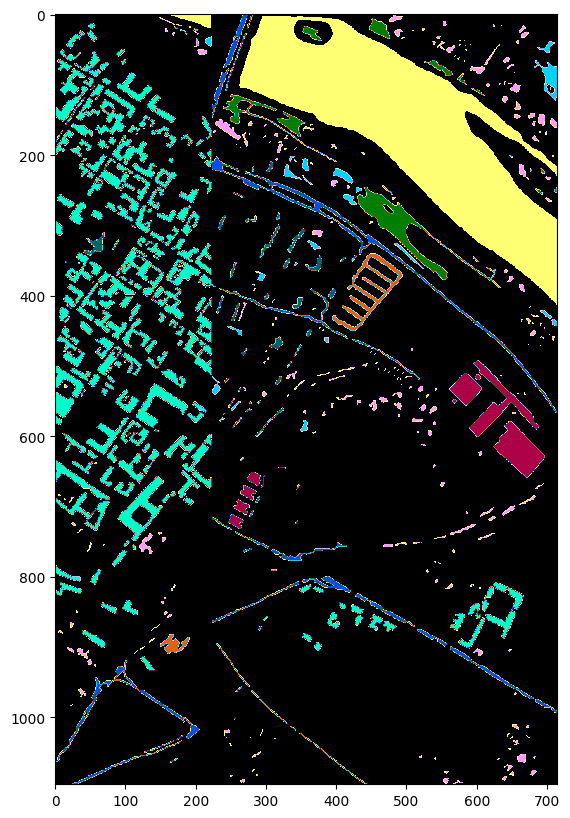

In [24]:
plt.figure(figsize=(10, 10))
plt.imshow(gt_data, cmap=my_c10map)
plt.show()

In [25]:
data.shape[0]

1096

In [26]:
data_mat = data.reshape(-1, data.shape[2]).T

In [27]:
data_mat.shape

(102, 783640)

In [28]:
gt_vec = gt_data.flatten()

In [29]:
np.sort(np.unique(gt_vec))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [30]:
indices = np.where(gt_vec == 1)[0]

In [31]:
len(indices)

65971

In [32]:
indices[1]

162

In [33]:
rand_idx1 = np.random.choice(indices, 300, False)

In [34]:
len(rand_idx1)

300

In [35]:
rand_idx1

array([214426, 243086,  46159,  57652, 238085, 124265, 158586, 121494,
       112768, 113404,  97130, 233020, 202189,  56193, 102049, 189378,
       108414,  29037, 154251, 116986, 145762,  92620, 137182, 157904,
       181531, 133541, 137158,  82079,   1757, 219444,  33295, 164281,
       141389, 127205,  67032, 224438,  51900,  76119, 154964,  96157,
        41937,  79085,  68350, 112091, 111940, 187254,  58410,  82749,
       119254, 124857, 157217,  83491,  43916,  51092,  41902, 198023,
       182236, 177248,  87739, 197945, 223711, 149347, 234417,  99953,
        41167, 138532, 238741, 211550, 219487,  31199, 162804,  57718,
         6628,  15438,  38984, 255211,  56238,  91858,  83494, 104842,
       245874, 118497, 166506, 106444,  73481, 225887, 258087, 159996,
        81135, 201605, 230897, 195162,  99060, 177855, 187884,  31799,
        32628, 243010, 218030, 114178, 106337, 143491,  54641,  89215,
       150732, 172121,  69774,  49769,  51849,  68441,  46865, 232327,
      

In [36]:
selec_data = data_mat[:, rand_idx1]

In [37]:
selec_data.shape

(102, 300)

In [38]:
mean_vector = np.mean(selec_data, axis=1)

In [39]:
mean_vector.shape

(102,)

## Mean Classifier

In [40]:
class MeanClassifier:
    def __init__(self, mean_vectors):

        """
        Parameters:
            mean_vectors: List containing the mean vector for each valid label.
        """
        
        self.mean_vectors = mean_vectors

In [41]:
def fit_mean(data, gt_data):

    """
    Parameters:
        data: A 3D array of shape (height, width, bands) representing the data cube
        gt_data: A 2D array of shape (height, width) representing the ground truth labels, 0 reperesenting the background

    Returns:
        MeanClassifier: An instance of MeanClassifier with computed mean vectors
    """

    data_mat = data.reshape(-1, data.shape[2]).T
    gt_vec = gt_data.flatten()
    gt_labels = np.sort(np.unique(gt_vec))
    valid_labels = gt_labels[gt_labels != 0]

    mean_vectors = []
    for label in valid_labels:
        indices = np.where(gt_vec == label)[0]

        idx_size = min(3000, len(indices))

        selected_indices = np.random.choice(indices, idx_size, False)
        selected_points = data_mat[:, selected_indices]

        mean_vector = np.mean(selected_points, axis=1)
        mean_vectors.append(mean_vector)

    return MeanClassifier(mean_vectors)

In [42]:
mean_classifier = fit_mean(data, gt_data)

In [43]:
mean_classifier.mean_vectors[1]

array([ 535.652     ,  451.62833333,  366.87933333,  316.14833333,
        294.58633333,  292.15166667,  295.57666667,  290.89233333,
        282.718     ,  275.50666667,  268.748     ,  257.40133333,
        249.08433333,  243.449     ,  238.37633333,  231.239     ,
        230.85633333,  234.31766667,  239.976     ,  249.80166667,
        265.01166667,  288.49233333,  315.49466667,  345.914     ,
        382.27966667,  419.016     ,  444.16166667,  460.061     ,
        470.50733333,  481.92466667,  492.43233333,  494.51766667,
        487.54266667,  476.14433333,  459.159     ,  437.406     ,
        414.23133333,  394.477     ,  379.78633333,  369.27866667,
        359.71633333,  351.32166667,  345.93866667,  342.06      ,
        338.10366667,  331.479     ,  321.746     ,  312.363     ,
        307.43966667,  303.134     ,  301.77666667,  299.53133333,
        294.20466667,  287.35766667,  277.492     ,  267.359     ,
        258.86366667,  249.405     ,  239.25033333,  229.84433

In [44]:
def classify(data, classifier):
    """
    Parameters:
        data: A 2D array of shape (bands, n_pixels), where each column is a pixel
        classifier: An object with attribute 'mean_vectors', a list of 1D numpy arrays
        
    Returns:
        pixel_classes: A 1D array of length n_pixels containing predicted pixel labels 
    """

    Dnorms = np.sum(np.square(data), axis=0)
    resids = []
    for Uc in classifier.mean_vectors:
        innerprod = np.dot(data.T, Uc)
        Uc_norm = np.sum(np.square(Uc), axis=0)

        distances = np.sqrt(np.abs(Dnorms - 2 * innerprod + Uc_norm))
        resids.append(distances)


    resids = np.array(resids)
    pixel_classes = np.argmin(resids, axis=0) + 1

    return pixel_classes

In [45]:
mean_class_labels = classify(masked_data, mean_classifier)

In [46]:
np.unique(mean_class_labels)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [47]:
mean_class_labels.shape

(148152,)

In [48]:
clustermap = np.zeros(data.shape[:2])

In [49]:
clustermap[mask] = mean_class_labels

In [50]:
np.unique(clustermap)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [51]:
clustermap.shape

(1096, 715)

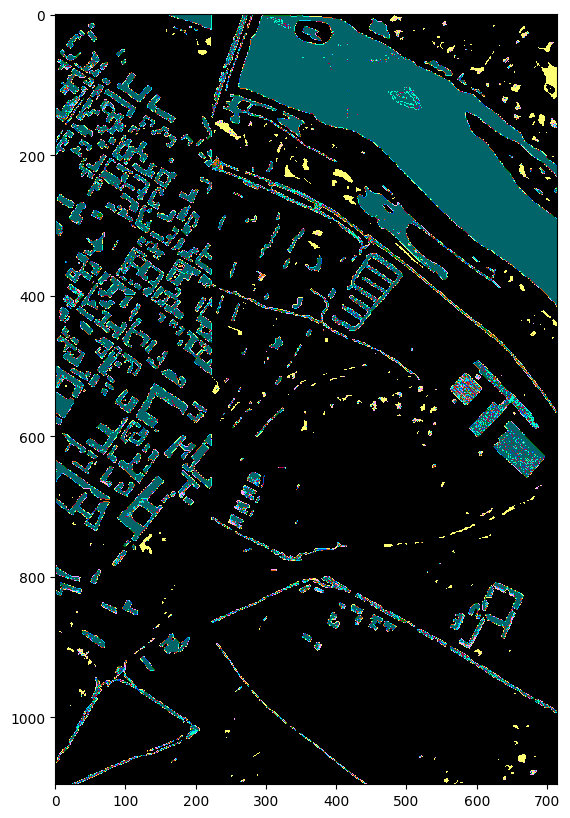

In [52]:
plt.figure(figsize=(10, 10))
plt.imshow(clustermap, cmap=my_c10map)
plt.show()